<a href="https://colab.research.google.com/github/boat1603/MyNotebooks/blob/main/MyLibrary/CWTPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output
# Load My Library
u = input('Input Github Username: ').strip()
p = input('Input Github Password: ').strip()
clear_output(wait=True)
!git clone https://$u:$p@github.com/boat1603/cwtTorch.git
del u,p

Cloning into 'cwtTorch'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (41/41), done.
Unpacking objects: 100% (54/54), done.
remote: Total 54 (delta 12), reused 54 (delta 12), pack-reused 0


# Tutorial

In [2]:
%cd /content/cwtTorch
import numpy as np
import torch

from cwtTorch import cwtTorch
import pywt

import matplotlib.pyplot as plt
%matplotlib inline

/content/cwtTorch


## Basic

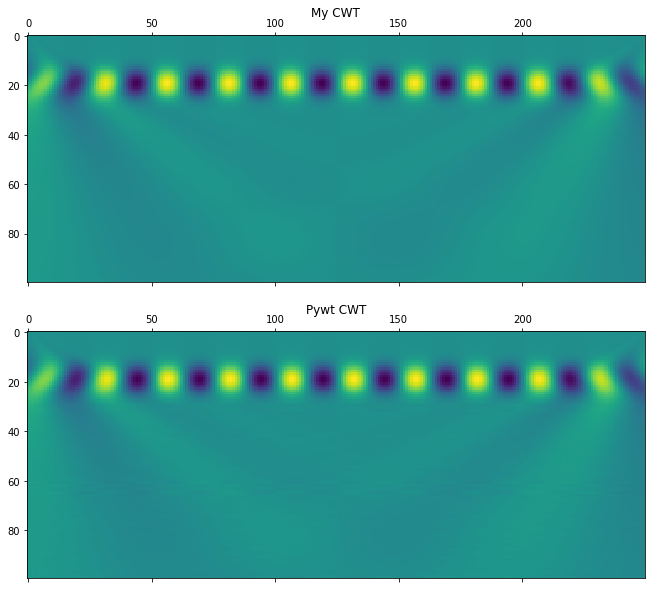

In [3]:
# Generate Signal
t = np.arange(0,10,0.04)
y = np.sin(2*np.pi*t)
signal_length = len(y)

# My CWT 
# Built-in wavelet: ['morl', 'mexh', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8']
if torch.cuda.is_available():
  morl = cwtTorch(signal_length=signal_length, freq_scales=np.arange(1,101), wavelet='morl', cuda = True)
else:
  morl = cwtTorch(signal_length=signal_length, freq_scales=np.arange(1,101), wavelet='morl', cuda = False)
coef_mycwt = morl.CWTransform(y)

# Original Pywt Library
coef_pywt, freqs=pywt.cwt(y,np.arange(1,101),'morl')

fig,ax = plt.subplots(2,1,figsize =(20,10))
ax[0].matshow(coef_mycwt)
ax[0].set_title('My CWT')

ax[1].matshow(coef_pywt)
ax[1].set_title('Pywt CWT')
fig.show()

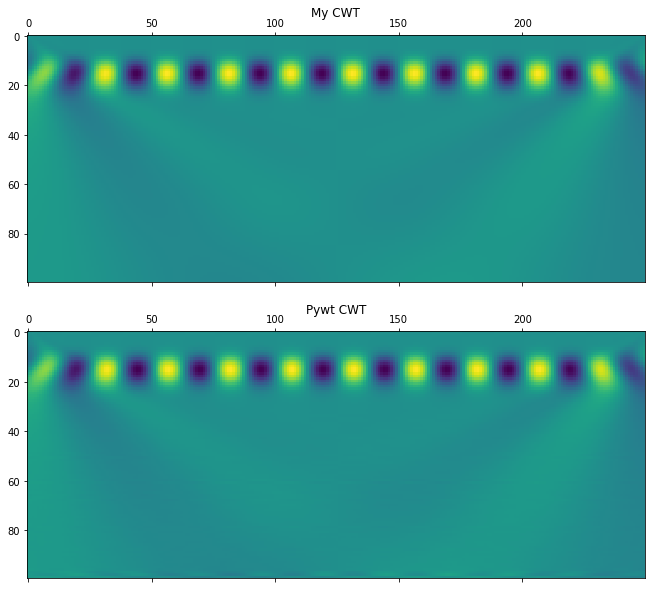

In [4]:
if torch.cuda.is_available():
  gaus8 = cwtTorch(signal_length=signal_length, freq_scales=np.arange(1,101), wavelet='gaus8', cuda = True)
else:
  gaus8 = cwtTorch(signal_length=signal_length, freq_scales=np.arange(1,101), wavelet='gaus8', cuda = False)
coef_mycwt = gaus8.CWTransform(y)

# Original Pywt Library
coef_pywt, freqs=pywt.cwt(y,np.arange(1,101),'gaus8')

fig,ax = plt.subplots(2,1,figsize =(20,10))
ax[0].matshow(coef_mycwt)
ax[0].set_title('My CWT')

ax[1].matshow(coef_pywt)
ax[1].set_title('Pywt CWT')
fig.show()

## Use Custom wavelet Function

Real Shanon Wavelet <br>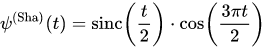

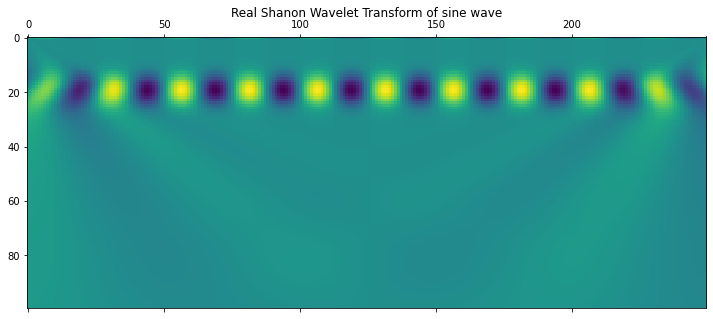

In [5]:
# Custom wavelet Function
# Only Real Function
def Real_Shanon_Wavelet(t):
  return np.sinc(t/2)*np.cos(3*np.pi*t/2)

# Generate Signal
t = np.arange(0,10,0.04)
y = np.sin(2*np.pi*t)
signal_length = len(y)

# CWT
if torch.cuda.is_available():
  RSW = cwtTorch(signal_length=signal_length, freq_scales=np.arange(1,101), wavelet=Real_Shanon_Wavelet, cuda = True)
else:
  RSW = cwtTorch(signal_length=signal_length, freq_scales=np.arange(1,101), wavelet=Real_Shanon_Wavelet, cuda = False) 
coef = morl.CWTransform(y)

fig,ax = plt.subplots(figsize =(20,5))
ax.matshow(coef)
ax.set_title('Real Shanon Wavelet Transform of sine wave')

fig.show()

# Performance

In [6]:
%cd /content/cwtTorch
from tqdm import tqdm
import numpy as np
import torch

from cwtTorch import cwtTorch
import pywt

import matplotlib.pyplot as plt
%matplotlib inline

/content/cwtTorch


In [7]:
# Generate Random Signal
np.random.seed(10)
batch_data = np.random.rand(1000,500)
signal_length = 500
batch_data.shape

(1000, 500)

In [8]:
# Pywt Performance
%%time
coef_pywt = np.zeros((1000,100,500))
for i in tqdm(range(batch_data.shape[0])):
  c, f=pywt.cwt(batch_data[i],np.arange(1,101),'morl')
  coef_pywt[i,:,:] = c

100%|██████████| 1000/1000 [00:18<00:00, 53.77it/s]

CPU times: user 18.5 s, sys: 357 ms, total: 18.8 s
Wall time: 18.8 s


In [9]:
!nvidia-smi

Mon May  3 13:31:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    73W / 149W |    440MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
# My CWT Performance using GPU
%%time
if torch.cuda.is_available():
  mexh = cwtTorch(signal_length=signal_length, freq_scales=np.arange(1,101), wavelet='mexh', cuda = True)
  coef_mycwt = mexh.CWTransform(y)
else:
  print('CUDA is not available')

CPU times: user 11.9 ms, sys: 2.94 ms, total: 14.9 ms
Wall time: 17.7 ms


In [11]:
# My CWT Performance using CPU
%%time
mexh = cwtTorch(signal_length=signal_length, freq_scales=np.arange(1,101), wavelet='mexh', cuda = False)
coef_mycwt = mexh.CWTransform(y)

CPU times: user 15.4 ms, sys: 2.91 ms, total: 18.3 ms
Wall time: 85.4 ms
